<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE_633.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOMEWORK 1

#DATA EXPLORATION


In this section, I have just parsed the dataset into lists to plot the histograms as required by question 2.(a) and 2.(b). It is visible that the data is not equally distributed. There are more data samples in the Benign case than in the Malignant case. Most features are more or less distributed noramlly. 

Number of Benign cases are: 330 
Number of malignant cases are: 153 
No, the two classes are not equally distributed.



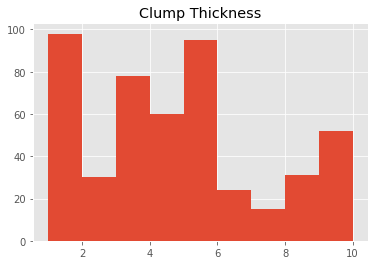

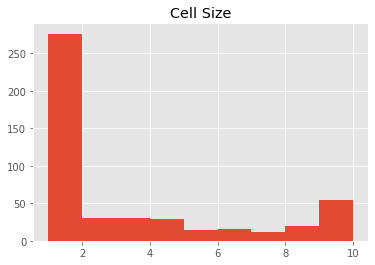

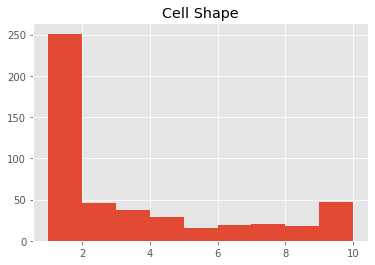

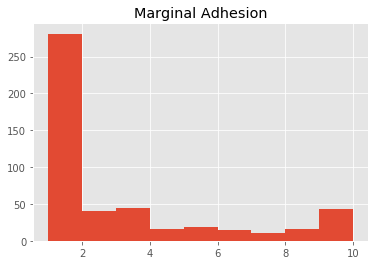

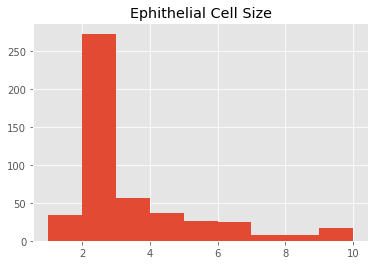

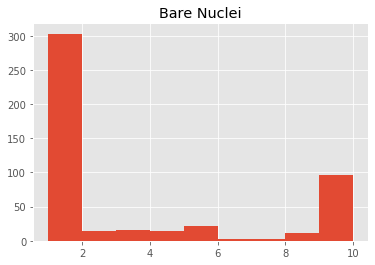

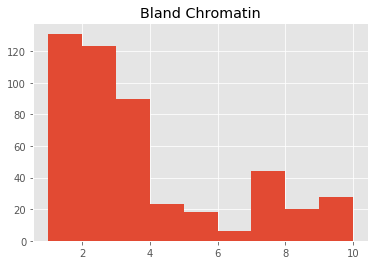

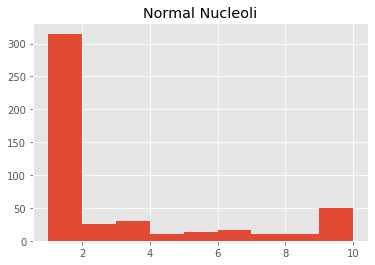

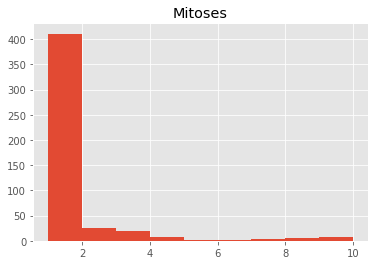

In [20]:
import csv
import matplotlib.pyplot as plt
import numpy as np

malign = 0
benign = 0
Clump_Thick =  []
Cell_Size = []
Cell_Shape =  []
Marg_Adh =  []
E_Cell_Size = []
B_Nuclei =  []
Bland_Chromatin =  []
Norm_Nucleoli =  []
Mitoses =  []
type_cancer =  [] 


with open('hw1_question1_train.csv') as csvfile: 
  readCSV = csv.reader(csvfile)
  for row in readCSV: 
    '''read each value from the row and place it in an appropriate list. 
    these lists contain each individual column of our data. 
    '''
    Clump_Thick.append(int(row[0]))
    Cell_Size.append(int(row [1]))
    Cell_Shape.append(int(row [2]))
    Marg_Adh.append(int(row [3]))
    E_Cell_Size.append(int(row [4]))
    B_Nuclei.append(int(row [5]))
    Bland_Chromatin.append(int(row [6]))
    Norm_Nucleoli.append(int(row [7]))
    Mitoses.append(int(row [8]))
    type_cancer.append(row [9])
    '''
    maintain two variables that hold the number of malignant cases and 
    the number of benign cases
    '''
    if (row [9]== '2'):
      benign = benign + 1
    else: 
      malign = malign + 1
  
#PLOTTING THE FEATURES
print ("Number of Benign cases are:", benign, "\nNumber of malignant cases are:",malign,"\nNo, the two classes are not equally distributed.\n")
plt.style.use('ggplot')
'''
Plotting the histogram of the various features. 
'''
plt.title('Clump Thickness')
plt.hist(np.sort(Clump_Thick),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Cell Size')
plt.hist(np.sort(Cell_Size),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Cell Shape')
plt.hist(np.sort(Cell_Shape),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Marginal Adhesion')
plt.hist(np.sort(Marg_Adh),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Ephithelial Cell Size')
plt.hist(np.sort(E_Cell_Size),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Bare Nuclei')
plt.hist(np.sort(B_Nuclei),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Bland Chromatin')
plt.hist(np.sort(Bland_Chromatin),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Normal Nucleoli')
plt.hist(np.sort(Norm_Nucleoli),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()
plt.title('Mitoses')
plt.hist(np.sort(Mitoses),bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()





# IMPLEMENTATION OF k-NN

In my implementation of k-NN, I first created a class called 'Datapoint'. An object of this class holds all the feautres of our dataset. Also the class has a couple of helper functions to make things easier. 

The dataset is parsed and the corresponding datapoints are then created. To compute the nearest neighbors I have used 3 different distance metrics; euclidean distance, hamming distance and cosine similarity. Having used the training and test data I finally compare the performance of the 3 distance metrics and for different values of 'k'. 

Total Number of Data Points in Training set: 483
Total Number of Data Points in Dev set: 100
Total Number of Data Points in Testing set: 100


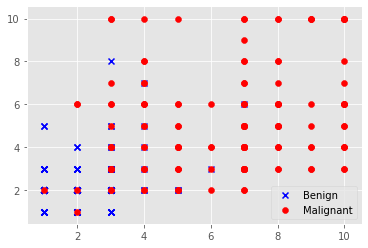

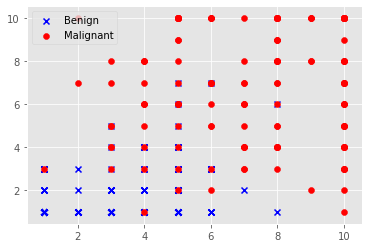

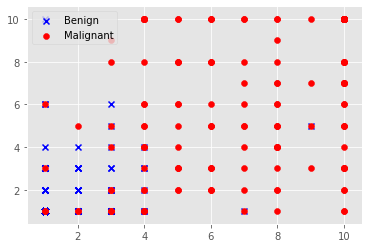

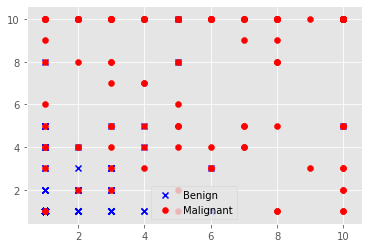

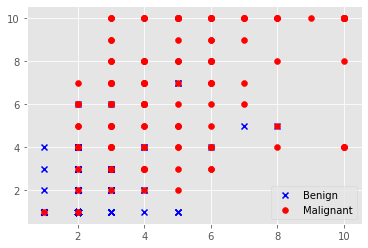

The Datapoints are not linearly sperable.

TRAINING MODEL WITH EUCLIDEAN DISTANCE AS THE DISTANCE METRIC

Running for K = 1
Accuracy: 0.97 
Balanced Accuracy: 0.9708557255064076

Running for K = 3
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 5
Accuracy: 0.98 
Balanced Accuracy: 0.9793303017775941

Running for K = 7
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 9
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 11
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 13
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 15
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 17
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 19
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745


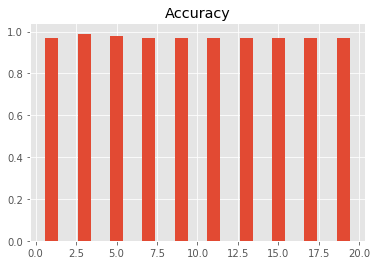

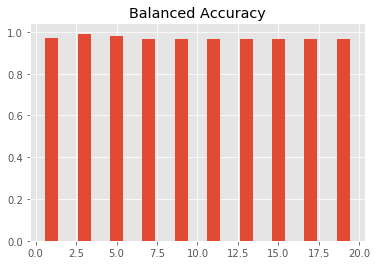

Best K1 is 3
Best K2 is 3

TRAINING MODEL WITH HAMMING DISTANCE AS THE DISTANCE METRIC

Running for K = 1
Accuracy: 0.97 
Balanced Accuracy: 0.9671351798263745

Running for K = 3
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 5
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 7
Accuracy: 0.98 
Balanced Accuracy: 0.9793303017775941

Running for K = 9
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 11
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 13
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 15
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 17
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136

Running for K = 19
Accuracy: 0.99 
Balanced Accuracy: 0.9915254237288136


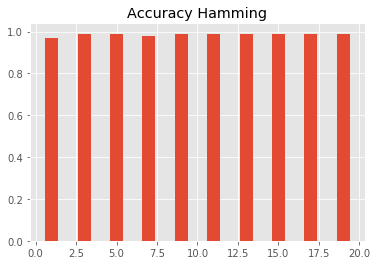

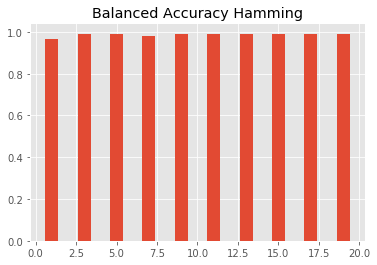

Best K1 is 3
Best K2 is 3

TRAINING MODEL WITH COSINE SIMILARITY AS THE DISTANCE METRIC AND k=3

Running for K = 1
Accuracy: 0.91 
Balanced Accuracy: 0.9051260851591567

Running for K = 3
Accuracy: 0.89 
Balanced Accuracy: 0.8770152955766846

Running for K = 5
Accuracy: 0.91 
Balanced Accuracy: 0.9014055394791236

Running for K = 7
Accuracy: 0.9 
Balanced Accuracy: 0.8892104175279041

Running for K = 9
Accuracy: 0.9 
Balanced Accuracy: 0.8892104175279041

Running for K = 11
Accuracy: 0.9 
Balanced Accuracy: 0.8892104175279041

Running for K = 13
Accuracy: 0.89 
Balanced Accuracy: 0.8807358412567177

Running for K = 15
Accuracy: 0.91 
Balanced Accuracy: 0.9051260851591567

Running for K = 17
Accuracy: 0.93 
Balanced Accuracy: 0.9257957833815627

Running for K = 19
Accuracy: 0.94 
Balanced Accuracy: 0.9379909053327822


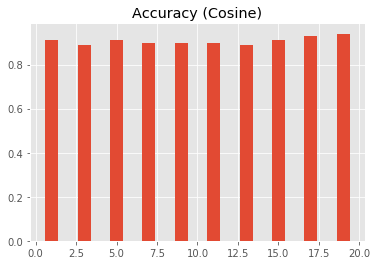

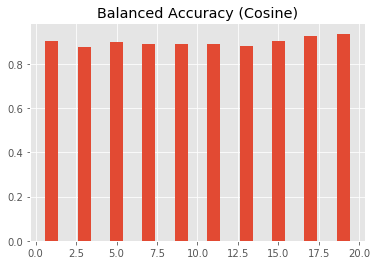

Best K1 is 11
Best K2 is 11

COMPARING THE 3 DISTANCE METRICS!
ACC and bACC Values for Euclidean Distance:  [0.97, 0.99, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97] 
 [0.9708557255064076, 0.9915254237288136, 0.9793303017775941, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745, 0.9671351798263745]
ACC and bACC Values for Hamming Distance:  [0.97, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99] 
 [0.9671351798263745, 0.9915254237288136, 0.9915254237288136, 0.9793303017775941, 0.9915254237288136, 0.9915254237288136, 0.9915254237288136, 0.9915254237288136, 0.9915254237288136, 0.9915254237288136]
ACC and bACC Values for Cosine Similarity:  [0.91, 0.89, 0.91, 0.9, 0.9, 0.9, 0.89, 0.91, 0.93, 0.94] 
 [0.9051260851591567, 0.8770152955766846, 0.9014055394791236, 0.8892104175279041, 0.8892104175279041, 0.8892104175279041, 0.8807358412567177, 0.9051260851591567, 0.9257957833815627, 0.9379909053327822]

TRAINING MODEL 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from scipy import spatial
import csv
import math as m
import operator

#Creating a class for representing the Datapoints.

class Datapoint(object):
  
  def __init__ (self, feats):
      self.feature_1 = feats['Clump_Thick']
      self.feature_2 = feats['U_CSize']
      self.feature_3 = feats['CShape']
      self.feature_4 = feats['M_Adh']
      self.feature_5 = feats['E_CSize']
      self.feature_6 = feats['B_Nuclei']
      self.feature_7 = feats['Bl_Chroma']
      self.feature_8 = feats['Norm_Nucleoli']
      self.feature_9 = feats['Mitoses']
      self.type_of_tumor = feats['type_of_tumor']
  #Returns the features as a Numpy Array. 
  def feature_vector (self):
      return np.array([self.feature_1, self.feature_2, self.feature_3,\
                       self.feature_4, self.feature_5, self.feature_6,\
                       self.feature_7, self.feature_8, self.feature_9, self.type_of_tumor])
  
  def __str__(self):
    return "\nClump Thickness:{}, \nCell Size:{}, \nCell Shape:{}, \nMarginal Adhesion:{},\
     \nEpithelial Cell Size:{}, \nBare Nuclei:{}, \nBland Chromatin:{}, \
     \nNormal Nucleoli:{}, \nMitoses:{}, \nType of Tumor:{}".format(self.feature_1, self.feature_2, self.feature_3, self.feature_4, self.feature_5,\
                                                                  self.feature_6, self.feature_7, self.feature_8,  self.feature_9, self.type_of_tumor)
#Function that creates the datapoints and writes the corresponding feature value to the datapoints. 
def parse_dataset(filename):
    with open(filename) as csvfile: 
      dataset = []
      readCSV = csv.reader(csvfile)
      for row in readCSV: 
        a=Datapoint({'Clump_Thick':int(row[0]), 'U_CSize':int(row[1]), 'CShape':int(row[2]), 'M_Adh':int(row[3]), \
                                  'E_CSize':int(row[4]), 'B_Nuclei':int(row[5]), 'Bl_Chroma':int(row[6]), 'Norm_Nucleoli':int(row[7]),
                                  'Mitoses':int(row[8]),'type_of_tumor':int(row[9])})
        
        dataset.append(a.feature_vector())
    
    
    return dataset

#PARSE the training , development and testing  dataset.
dataset_train = parse_dataset('hw1_question1_train.csv')
dataset_test  = parse_dataset('hw1_question2_test.csv')
dataset_dev = parse_dataset('hw1_question2_dev.csv')
#Printing some statistics about the data.
print("Total Number of Data Points in Training set: {0}".format(len(dataset_train)))
print("Total Number of Data Points in Dev set: {0}".format(len(dataset_dev)))
print("Total Number of Data Points in Testing set: {0}".format(len(dataset_test)))

#Function to plot.
def plot_data(dataset,x,y): 
  
  benign_feat1 = [data[x] for data in dataset if data[9] == 2]
  benign_feat2 = [data[y] for data in dataset if data[9] == 2]
  malign_feat1 = [data[x] for data in dataset if data[9] == 4]
  malign_feat2 = [data[y] for data in dataset if data[9] == 4]
  plt.scatter(benign_feat1,benign_feat2, c='b',marker ='x', label = 'Benign')
  plt.scatter(malign_feat1,malign_feat2, c='r',marker ='o', label = 'Malignant')
  plt.legend()
  plt.show()
#Plotting 5 random sets of features. It is not really random, but just different combinations 
#features
plot_data(dataset_train, 6, 4)
plot_data(dataset_train, 0, 2)
plot_data(dataset_train, 1, 3)
plot_data(dataset_train, 3, 5)
plot_data(dataset_train, 4, 2)

print("The Datapoints are not linearly sperable.")

#-------------------------------------------------------------CLASSIFICATION----------------------------------------------------------------------------------------------------
''' 
As a first step in classification, I define a function that can compute the eucledian distance between two datapoints
'''
#DISTANCE METRICS-------------------------------------------------
def EuclidDistance (instance1, instance2, length): 
  distance = 0 
  for x in range(length):
    distance += pow((instance1[x]-instance2[x]),2)
  return m.sqrt(distance)

def hamming_distance(instance1, instance2, length):
  return(distance.hamming(instance1, instance2))

def cosine_similarity(instance1, instance2, length):
  return(spatial.distance.cosine(instance1, instance2))
#------------------------------------------------------------------   
# Function to compute the neighbors to the test point. 
def getNeighbors(dataset, testcase, k):
  distances = []
  length = len(testcase) - 1
  for x in range((len(dataset))):
    dist = EuclidDistance(testcase,dataset[x],length)
    distances.append((dataset[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range (k):
      neighbors.append(distances[x][0])
  return neighbors 

def getNeighbors_hamming(dataset, testcase, k):
  distances = []
  length = len(testcase) - 1
  for x in range((len(dataset))):
    dist = hamming_distance(testcase,dataset[x],length)
    distances.append((dataset[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range (k):
      neighbors.append(distances[x][0])
  return neighbors 

def getNeighbors_cosine(dataset, testcase, k):
  distances = []
  length = len(testcase) - 1
  for x in range((len(dataset))):
    dist = cosine_similarity(testcase,dataset[x],length)
    distances.append((dataset[x],dist))
  distances.sort(key=operator.itemgetter(1))
  neighbors = []
  for x in range (k):
      neighbors.append(distances[x][0])
  return neighbors
#------------------------ End of Distance Metrics-------------------------------
#Function that calculates the final class based on a vote. 
def getResponse(neighbors):
    votes = []
    four = 0
    two = 0
    for x in range (len(neighbors)):
      response = neighbors [x][-1]
      votes.append(neighbors[x][-1])
    for x in votes: 
      if x == 2: 
        two += 1
      else: 
        four += 1
    if (two>four):
      result = 2 
    else: 
      result = 4
    return (result)
#-------------------------------------------------------------------------------
#Accuracy calculations
def Acc (classified,dataset): 
  count = 0
  for x in range (len(dataset)): 
    if (classified[x]==dataset[x][-1]):
      count += 1
  acc = float(count/(len(dataset)))
  return(acc)

def bAcc (classified,dataset): 
  one = 0
  two = 0
  count1 = 0
  count2 = 0
  for x in range (len(dataset)): 
    if (dataset[x][-1]== 2):
      one += 1 
    else: 
      two += 1
  for x in range (len(dataset)): 
    if (classified[x]==dataset[x][-1] & classified [x]==2):
      count1 += 1
    elif (classified[x]==dataset[x][-1] & classified [x]==4):
      count2 += 1
  bacc = 0.5*((count1/one) + (count2/two)) 
  return(bacc)
#------------------------------------------------------------------------------- 
#KNN CLASSIFICATION (EUCLIDEAN Distance)
print("\nTRAINING MODEL WITH EUCLIDEAN DISTANCE AS THE DISTANCE METRIC")
k_values = [1,3,5,7,9,11,13,15,17,19]
acc_values = []
bacc_values = []
for k in k_values: 
  neighbors = []
  classified = []
  print("\nRunning for K =", k)
  for data in dataset_dev:
    neighbors= (getNeighbors(dataset_train, data, k))
    classified.append(getResponse (neighbors))
  print('Accuracy:',Acc(classified,dataset_dev),'\nBalanced Accuracy:',\
        bAcc(classified,dataset_dev))
  acc_values.append(Acc(classified, dataset_dev))
  bacc_values.append(bAcc(classified,dataset_dev))
plt.title('Accuracy')
plt.bar(k_values,acc_values)
plt.show()

plt.title('Balanced Accuracy')
plt.bar(k_values,bacc_values)
plt.show()
euclidean_metric = [acc_values,bacc_values]
print('Best K1 is', acc_values.index(max(acc_values))+2)
print('Best K2 is', bacc_values.index(max(bacc_values))+2)
#-------------------------------------------------------------------------------
#KNN using Hamming Distance
print("\nTRAINING MODEL WITH HAMMING DISTANCE AS THE DISTANCE METRIC")
k_values = [1,3,5,7,9,11,13,15,17,19]
acc_values = []
bacc_values = []
for k in k_values: 
  neighbors = []
  classified = []
  print("\nRunning for K =", k)
  for data in dataset_dev:
    neighbors= (getNeighbors_hamming(dataset_train, data, k))
    classified.append(getResponse (neighbors))
  print('Accuracy:',Acc(classified,dataset_dev),'\nBalanced Accuracy:',\
        bAcc(classified,dataset_dev))
  acc_values.append(Acc(classified, dataset_dev))
  bacc_values.append(bAcc(classified,dataset_dev))
plt.title('Accuracy Hamming')
plt.bar(k_values,acc_values)
plt.show()

plt.title('Balanced Accuracy Hamming')
plt.bar(k_values,bacc_values)
plt.show()
hamming_metric = [acc_values,bacc_values]
print('Best K1 is', acc_values.index(max(acc_values))+2)
print('Best K2 is', bacc_values.index(max(bacc_values))+2)

#-------------------------------------------------------------------------------
#KNN Using Cosine Similarity
k_values = [1,3,5,7,9,11,13,15,17,19]
acc_values = []
bacc_values = []
print("\nTRAINING MODEL WITH COSINE SIMILARITY AS THE DISTANCE METRIC AND k=3")
for k in k_values: 
  neighbors = []
  classified = []
  print("\nRunning for K =", k)
  for data in dataset_dev:
    neighbors= (getNeighbors_cosine(dataset_train, data, k))
    classified.append(getResponse (neighbors))
  print('Accuracy:',Acc(classified,dataset_dev),'\nBalanced Accuracy:',\
        bAcc(classified,dataset_dev))
  acc_values.append(Acc(classified, dataset_dev))
  bacc_values.append(bAcc(classified,dataset_dev))
plt.title('Accuracy (Cosine)')
plt.bar(k_values,acc_values)
plt.show()

plt.title('Balanced Accuracy (Cosine)')
plt.bar(k_values,bacc_values)
plt.show()
cosine_metric = [acc_values,bacc_values]
print('Best K1 is', acc_values.index(max(acc_values))+2)
print('Best K2 is', bacc_values.index(max(bacc_values))+2)
#------------------------------------------------------------------------------------------
print("\nCOMPARING THE 3 DISTANCE METRICS!")
print("ACC and bACC Values for Euclidean Distance: ",euclidean_metric[0],'\n',euclidean_metric[1])
print("ACC and bACC Values for Hamming Distance: ",hamming_metric[0],'\n',hamming_metric[1])
print("ACC and bACC Values for Cosine Similarity: ",cosine_metric[0], '\n',cosine_metric[1])
#----------------------------------TESTING--------------------------------------
#KNN using Hamming Distance
print("\nTRAINING MODEL WITH HAMMING DISTANCE AS THE DISTANCE METRIC")
k_values = [3]
acc_values = []
bacc_values = []
for k in k_values: 
  neighbors = []
  classified = []
  #print("\nRunning for K =", k)
  for data in dataset_test:
    neighbors= (getNeighbors_hamming(dataset_train, data, 3))
    classified.append(getResponse (neighbors))
  print('Accuracy:',Acc(classified,dataset_test),'\nBalanced Accuracy:',\
        bAcc(classified,dataset_test))


At the end the best set of parameters is K=3 and using Hamming distance as the distance metric. We see an Accuracy if 99% and a Balanced Accuracy of 98.6%. 
